This file is used for retrieving and plotting icon detections and classifications on top of infographic images. 
The provided detectionsList_classified.pckl pickle file contains the pre-computed detections and classifications for over 63K infographics. These results can be used for applicatins including topic prediction, summarization, captioning, question answering, etc. 

Zoya Bylinskii, 10/2018

In [1]:
import pickle as pkl
from PIL import Image
import os
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [2]:
IMDIR = '/data/graphics/SpandanGraphsProject/fullsize-60k/' # change to dir where infographic images are downloaded

tag_list_file = '29kfiles/map_labels_tags.txt'
with open(tag_list_file) as file:  
    tag_list = file.read() 
tag_list = tag_list.split('\n')
tag_map = dict((int(elem.split(' ',1)[0]),elem.split(' ',1)[1]) for elem in tag_list if elem) # map tag ID to name

In [3]:
detectionsList = pkl.load(open("detectionsList_classified.pckl", "rb"))
print('Icon detections and classifications are available for %d infographics.'%(len(detectionsList)))
# detectionList maps a filename to a list of numbers:
# the first 4 integers are the left, top, right, and bottom (respectively) coordinates of the detected bounding box
# the next 5 numbers are in the format M:N where M is the tag ID and N is the confidence of the classification (top 5)
# the classifications are sorted in decreasing order of confidence 

Icon detections and classifications are available for 63560 infographics.


In [4]:
# plot results for a particular file
curfile = 'most-interesting-uses-for-a-virtual-assistant_51e59b55b9207.png'
bboxlist = detectionsList[curfile]

In [ ]:
# plot results for a randomly-selected file (different every time)
allkeys = list(detectionsList.keys())
res = np.random.permutation(len(allkeys))
curfile = allkeys[res[0]]
bboxlist = detectionsList[curfile]

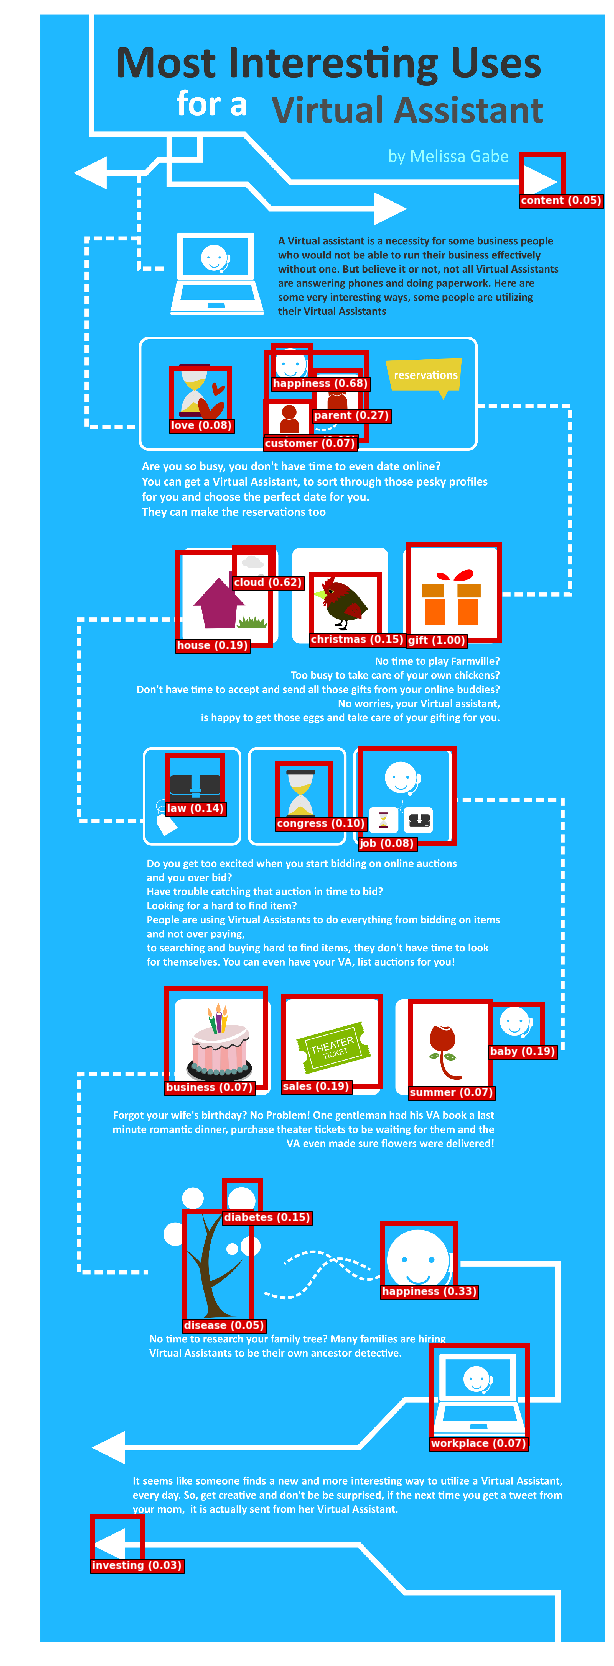

In [5]:
# plot results
im = Image.open(os.path.join(IMDIR,curfile))
fig,ax = plt.subplots(1,figsize=(50,30));
ax.imshow(im); plt.axis('off');
w,h = im.size

plotclassifications = True # mark as False if only care about detections

for item in bboxlist:
    bboxnums = item.split()

    # convert coordinates of bounding box from normalized coordinates to rectangle coordinates
    left = int(w*float(bboxnums[0])/1000.0)
    top = int(h*float(bboxnums[1])/1000.0)
    right = int(w*float(bboxnums[2])/1000.0)
    bottom = int(h*float(bboxnums[3])/1000.0)
    width = right - left
    height = bottom - top
    rect_icon = patches.Rectangle((left,top), width, height, facecolor='none',linewidth=5,edgecolor=(0.84839019607843136, 0.0, 0.0, 1.0))
    ax.add_patch(rect_icon)

    if plotclassifications:
        res = bboxnums[4].split(':')
        tag_pred = tag_map[int(res[0])]
        ax.text(left, bottom+10, '%s (%2.2f)'%(tag_pred,float(res[1])), \
                size = 10, weight = 'bold', color='white', \
                bbox={'facecolor':(0.84839019607843136, 0.0, 0.0, 1.0), 'alpha':1, 'pad':2})

plt.show()

    